In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [47]:
data=pd.read_csv('assignment2_dataset_cars.csv')
data.head()

,car_maker,year,kilometers,price
0,Toyota,2019,14999.5,58375.0
1,Kia,2006,0.0,10000.0
2,Toyota,2014,24999.5,58375.0
3,Ford,2010,200000.0,22425.4
4,Ford,2018,5000.0,22425.4


In [48]:
data.isnull().sum()

car_maker     0
year          0
kilometers    0
price         0
dtype: int64

In [49]:
le=LabelEncoder()
data['car_maker']=le.fit_transform(data['car_maker'])
data.head()

,car_maker,year,kilometers,price
0,10,2019,14999.5,58375.0
1,5,2006,0.0,10000.0
2,10,2014,24999.5,58375.0
3,3,2010,200000.0,22425.4
4,3,2018,5000.0,22425.4


<AxesSubplot:>

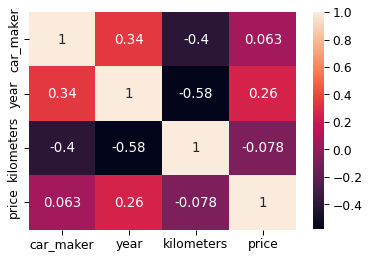

In [54]:
import seaborn as sns
import matplotlib.pyplot as lt

sns.set_context('paper',font_scale=1.4)
sns.heatmap(data.corr(),annot=True)

## split data


In [51]:
xtran,xtest,ytran,ytest=train_test_split(data.drop(['price'],axis=1),data['price'],train_size=.8)

In [52]:
model=LinearRegression()
model.fit(xtran,ytran)

LinearRegression()

In [57]:
pred=model.predict(xtest)

In [58]:
model.score(xtest,ytest)
metrics.mean_squared_error(ytest,pred)

746320679.9015329

# polynomyal 

In [75]:
poly=PolynomialFeatures(degree=5)
xpoly=poly.fit_transform(xtran)
linear=LinearRegression()
linear.fit(xpoly,ytran)
linear.score(poly.fit_transform(xtest),ytest)

0.9152427452364443

In [77]:
pred=linear.predict(poly.fit_transform(xtest))
metrics.mean_squared_error(ytest,pred)

68313589.70299561